In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                              


import warnings
warnings.filterwarnings("ignore")

In [2]:
dfi = pd.read_csv(r'D:\1 Катя\1 курсы\Аналитика\Итоговый проект\owid-covid-data.csv')

In [4]:
dfi.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [7]:
dfi['date'] = pd.to_datetime(dfi.date)

In [9]:
dfi.dtypes

iso_code                                           object
continent                                          object
location                                           object
date                                       datetime64[ns]
total_cases                                       float64
                                                ...      
human_development_index                           float64
excess_mortality_cumulative_absolute              float64
excess_mortality_cumulative                       float64
excess_mortality                                  float64
excess_mortality_cumulative_per_million           float64
Length: 67, dtype: object

In [16]:
df=dfi[dfi.location=='Kazakhstan'][dfi.date<'2021-04-01']

In [17]:
df=df[['date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'new_tests', 'total_tests', 
      'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'population', 'population_density', 
      'median_age', 'aged_65_older', 'aged_70_older', 'diabetes_prevalence', 'female_smokers', 'male_smokers']]

In [12]:
df.dtypes

date                       datetime64[ns]
total_cases                       float64
new_cases                         float64
total_deaths                      float64
new_deaths                        float64
new_tests                         float64
total_tests                       float64
total_vaccinations                float64
people_vaccinated                 float64
people_fully_vaccinated           float64
population                        float64
population_density                float64
median_age                        float64
aged_65_older                     float64
aged_70_older                     float64
diabetes_prevalence               float64
female_smokers                    float64
male_smokers                      float64
dtype: object

In [18]:
df=df.fillna(0)

In [19]:
# новый индекс
df.set_index('date',inplace=True)
df.index.freq = 'D'
df.head()

,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,population,population_density,median_age,aged_65_older,aged_70_older,diabetes_prevalence,female_smokers,male_smokers
date,,,,,,,,,,,,,,,,,
2020-03-13,4.0,4.0,0.0,0.0,0.0,126.0,0.0,0.0,0.0,18994958.0,6.681,30.6,6.991,4.625,7.11,7.0,43.1
2020-03-14,6.0,2.0,0.0,0.0,319.0,445.0,0.0,0.0,0.0,18994958.0,6.681,30.6,6.991,4.625,7.11,7.0,43.1
2020-03-15,9.0,3.0,0.0,0.0,207.0,652.0,0.0,0.0,0.0,18994958.0,6.681,30.6,6.991,4.625,7.11,7.0,43.1
2020-03-16,10.0,1.0,0.0,0.0,386.0,1038.0,0.0,0.0,0.0,18994958.0,6.681,30.6,6.991,4.625,7.11,7.0,43.1
2020-03-17,33.0,23.0,0.0,0.0,932.0,1970.0,0.0,0.0,0.0,18994958.0,6.681,30.6,6.991,4.625,7.11,7.0,43.1


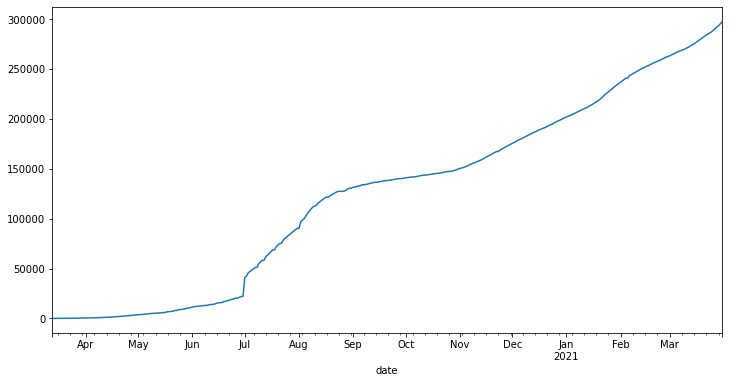

In [20]:
ax = df['total_cases'].plot(figsize=(12,6))
ax.autoscale(axis='x',tight=True)
#ax.set(xlabel=xlabel, ylabel=ylabel);

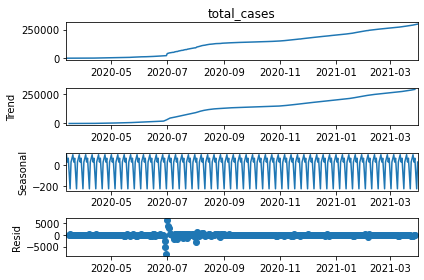

In [21]:
result = seasonal_decompose(df['total_cases'], model='add')
result.plot();